<h1 style="text-align:center">
    Movies
</h1>

<br>

<font color="darkblue">

<h3 style="text-align:center">
    Sebastian Calderon Quintero
</h3>
    
<h3 style="text-align:center">
    19/12/2024
</h3>

<hr>

# Introducción

<br>

En este proyecto se desarrolla en Python un análisis básico de datos sobre películas de cine de IMDB.
El set de datos que vamos a usar inicialmente se encuentra en la siguiente página:

https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset

En ella puede encontrarse información más detallada, así como una descripción precisa de cada columna.

<font>
El objetivo de este trabajo es utilizar Python para desarrollar diversas funciones que permitan analizar y extraer información relevante de una base de datos llamada movie_data, la cual contiene una amplia variedad de datos relacionados con películas.
</font>

<br>

Se plantean los apartados iniciales para su resolución *sin usar la libreria pandas*. Esto se propone así para forzar a practicar con las técnicas, herramientas y conceptos básicos de Python. Más adelante, hay otros apartados propuestos para su resolución con esta librería y otras.

<br>

<font>
A partir de los datos proporcionados, he conseguido presentar una serie de funciones desarrolladas para analizar y visualizar datos de la base de datos utilizando pandas y matplotlib. Las funcionalidades incluyen filtrar películas por género y mostrar las 5 con mayor puntaje IMDB y listar títulos de películas dirigidas por un director específico. Además, permite identificar los directores con más películas dirigidas, realizar filtrados específicos, y mostrar información relevante a partir de las URL que trae la base y son la pagina de IMBD de manera organizada para facilitar el análisis de las peliculas.

<br>

Aunque al final de este notebook detallaré la calificación que calculo honestamente, globalmente, siguiendo las puntuaciones que se asigna a cada apartado, diría que he obtenido una nota de 10 sobre 10.
</font>

<br>


# Datos de partida

(**Nota previa:** hasta el apartado específico de dataframes, se deben desarrollar las soluciones a los ejercicios propuestos sin usar la librería `pandas`, justamente para obligar a practicar con conceptos básicos de Python.)

Nuestra tabla de datos es el archivo de texto `movie_data.csv` que se encuentra en la carpeta `data_in`, y puede verse así con cualquier editor:

<br>

<center>
    <img src="./images/texto.png" width="100%">
</center>

La primera fila es la cabecera.
Esta fila cabecera contiene los nombres de los campos, separados por comas.
Yo la he marcado en azul para distinguirla fácilmente de las demás filas, que contienen los datos propiamente dichos,
esto es, los valores de dichos campos, consignando los datos de cada película en cada línea.

Si abrimos esta tabla con *excell* (importar datos csv con el separador `,`), vemos cada dato en una celda.

<br>

<center>
    <img src="./images/csv_1.png" width="100%">
</center>

<br>

Mostramos la hoja excell en dos imágenes por ser muy ancha.

<br>

<center>
    <img src="./images/csv_2.png" width="100%">
</center>

# Librerías y constantes globales

<br>

Pongamos todas las librerías necesarias al principio, tal como propone el estilo `pep-8`. Ej.:
<a href="https://www.python.org/dev/peps/pep-0008/">PEP 8 -- Style Guide for Python Code</a>.
    
De paso, en éste y otros lugares de Internet podrás encontrar detalles sobre estilo y presentación de código con un estilo estándar y cuidado. Examina esta página y trata de seguir esas indicaciones.

In [1]:
# Librerías:

import csv
import time
import requests
import pandas as pd
from collections import defaultdict
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from mrjob.job import MRJob

In [2]:
# Constantes globales:

# Ruta del archivo CSV que contiene los datos de las películas
MOVIES_DATA = 'movie_data.csv'

# Lista de columnas de interés para el análisis de los datos de las películas
columns_of_interest = [
    'movie_title',      # Título de la película
    'title_year',       # Año de estreno
    'director_name',    # Nombre del director
    'actor_1_name',     # Nombre del primer actor
    'language',         # Idioma de la película
    'country',          # País de producción
    'color',            # Color de la película (por ejemplo, si es a color o blanco y negro)
    'budget',           # Presupuesto de la película
    'imdb_score',       # Puntuación en IMDb
    'movie_imdb_link'   # Enlace al sitio de IMDb de la película
]

# Parte A. Ejercicios básicos sin usar `pandas` [2 puntos]

Esta parte inicial debe realizarse sin usar la librería `pandas`. Para practicar con esta librería, se plantean otros apartados más abajo.

### A.1. Exploración inicial básica del archivo de datos

Deseamos cargar el archivo de datos, que tiene un formato `csv`.
En este apartado, te recomiendo fuertemente usar la librería `cvs`,
que deberás importar en la primera celda del script, más arriba, no aquí.
(En los siguientes apartados, ya no mencionaré qué librerías usar
ni recordaré dónde se han de importar.)

Observa también que el test de funcionamiento te da el nombre de la función que deber definir
y algún otro identificador como es, por ejemplo, la constante `MOVIES_DATA`,
que debes definir también más arriba, en la segunda celda de este script.

Finalmente, observando el test, verás que se carga por separado la cabecera y las filas de datos.

In [3]:
#Función para guardar encabezados en una variable y los demas datos en otra

def load_full_data(csv_file):
    """
    Carga todos los datos del archivo CSV, incluyendo los encabezados y el contenido.

    Args:
        csv_file (str): La ruta al archivo CSV a cargar.

    Returns:
        tuple: Una tupla que contiene dos elementos:
            - full_header (list): La lista de encabezados del archivo CSV.
            - full_list_data (list): La lista de datos contenidos en el archivo CSV, sin los encabezados.
    """
    
    with open(csv_file, mode='r', encoding='utf-8') as datafile:
        reader = csv.reader(datafile)
        full_header = next(reader)  # Leer la primera línea como encabezado
        full_list_data = list(reader)  # Leer el resto de los datos
        
    return full_header, full_list_data

In [4]:
# Test de funcionamiento

full_header, full_list_data = load_full_data(MOVIES_DATA)

print(full_header)
print()
print(full_list_data[0:5])

['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

[['Color', 'James Cameron', '723', '178', '0', '855', 'Joel David Moore', '1000', '760505847', 'Action|Adventure|Fantasy|Sci-Fi', 'CCH Pounder', 'Avatar\xa0', '886204', '4834', 'Wes Studi', '0', 'avatar|future|marine|native|paraplegic', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1', '3054', 'English', 'USA', 'PG-13', '237000000', '2009', '936', '7.9', '1.78', '33000'], ['Color', 'Gore Verbinski', '302', '169', '563', '1000', 'Orlando Bloom', '40000', '309404152', 'Action|Adventure|F

Ahora, querríamos ver las posiciones de los identificadores de los campos, dados en la línea cabecera.

In [5]:
def list_of_enumerated_headers(csv_file):
    """
    Lee el encabezado del archivo CSV y devuelve una lista de los encabezados enumerados.

    Args:
        csv_file (str): La ruta al archivo CSV desde el cual se extraerán los encabezados.

    Returns:
        list: Una lista de tuplas, donde cada tupla contiene el índice y el encabezado correspondiente.
    """
    
    with open(csv_file, mode='r', encoding='utf-8') as datafile:
        read = csv.reader(datafile)
        full_header = next(read) 
        enumerated_headers = list(enumerate(full_header)) 
        
        print(enumerated_headers)

In [6]:
# Test de funcionamiento

list_of_enumerated_headers(MOVIES_DATA)

[(0, 'color'), (1, 'director_name'), (2, 'num_critic_for_reviews'), (3, 'duration'), (4, 'director_facebook_likes'), (5, 'actor_3_facebook_likes'), (6, 'actor_2_name'), (7, 'actor_1_facebook_likes'), (8, 'gross'), (9, 'genres'), (10, 'actor_1_name'), (11, 'movie_title'), (12, 'num_voted_users'), (13, 'cast_total_facebook_likes'), (14, 'actor_3_name'), (15, 'facenumber_in_poster'), (16, 'plot_keywords'), (17, 'movie_imdb_link'), (18, 'num_user_for_reviews'), (19, 'language'), (20, 'country'), (21, 'content_rating'), (22, 'budget'), (23, 'title_year'), (24, 'actor_2_facebook_likes'), (25, 'imdb_score'), (26, 'aspect_ratio'), (27, 'movie_facebook_likes')]


### A.2. Campos principales de una película

Los campos (columnas) del archivo son demasiados. No nos interesan todos ellos. Dada una lista con todos los campos, se pide extraer otra lista sólo con los campos con los que vamos a trabajar en los siguientes apartados: `movie_title`, `title_year`, `director_name`, `actor_1_name`, `language`, `country`, `color`, `budget`, `imdb_score` y `movie_imdb_link`.

In [7]:
def main_data_from_item(item):
    """
    Extrae los datos relevantes de un elemento (ítem) basándose en las columnas de interés.

    Args:
        item (list): Un elemento de datos (por ejemplo, una fila de un archivo CSV).

    Returns:
        list: Una lista con los datos extraídos del ítem, correspondientes a las columnas de interés.
              Si alguna columna no se encuentra en el encabezado, se agrega una cadena vacía.
    """
    movie_data = []
    for column in columns_of_interest:
        try:
            column_index = full_header.index(column)
            movie_data.append(item[column_index])
        except ValueError:
            movie_data.append('')
    return movie_data

In [8]:
# Test de funcionamiento

print(main_data_from_item(full_header))

print()

datos_avatar_2009 = main_data_from_item(full_list_data[0])
print(datos_avatar_2009)

print()

datos_star_wars_7 = main_data_from_item(full_list_data[4])
print(datos_star_wars_7)

['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']

['Avatar\xa0', '2009', 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', '237000000', '7.9', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1']

['Star Wars: Episode VII - The Force Awakens\xa0            ', '', 'Doug Walker', 'Doug Walker', '', '', '', '', '7.1', 'http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1']


### A.3. Algunos ajustes en los campos

Observa la anomalía en el string del título de la película. También, queremos tratar algunos campos como numéricos, ya sea enteros (el año y el presupuesto) o reales (la valoración). (Algunos campos numéricos enteros están vacíos en el archivo de datos; para ellos, el valor imputado será `-1`.) Además, en las urls de las películas no necesitaremos el fragmento final, iniciado con `?ref_`.

In [9]:
def datatypes_arranged(item):
    """
    Organiza y limpia los datos de un ítem (película), convirtiendo y formateando cada valor según su tipo.

    Args:
        item (list): Una lista con los datos de una película en bruto, como título, año, director, etc.

    Returns:
        list: Una lista con los datos organizados y limpios, con valores por defecto (-1) cuando no se puede procesar un dato.
    """
    cleaned_data = []
    
    cleaned_data.append(item[0].strip())  # movie_title

    try:  # year
        cleaned_data.append(int(item[1]) if item[1] != '' else -1)
    except ValueError:
        cleaned_data.append(-1)
    
    cleaned_data.append(item[2].strip())  # director_name
    cleaned_data.append(item[3].strip())  # actor_1_name
    cleaned_data.append(item[4].strip())  # language
    cleaned_data.append(item[5].strip())  # country
    cleaned_data.append(item[6].strip())  # color
    
    try:  # budget
        cleaned_data.append(int(item[7]) if item[7] != '' else -1)
    except ValueError:
        cleaned_data.append(-1)
    
    try:  # imdb_score
        cleaned_data.append(float(item[8]) if item[8] != '' else -1)
    except ValueError:
        cleaned_data.append(-1)
    
    # movie_imdb_link (procesar la URL)
    cleaned_data.append(item[9].split('?')[0].strip())  # movie_imdb_link

    return cleaned_data

In [10]:
# Test de funcionamiento

print(datatypes_arranged(datos_avatar_2009))

print(datatypes_arranged(datos_star_wars_7))

['Avatar', 2009, 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', 237000000, 7.9, 'http://www.imdb.com/title/tt0499549/']
['Star Wars: Episode VII - The Force Awakens', -1, 'Doug Walker', 'Doug Walker', '', '', '', -1, 7.1, 'http://www.imdb.com/title/tt5289954/']


### A.4. Recuperación de alguna información básica

<br>

Diseña funciones para recuperar la siguiente información:

<itemize>
    <li> El conjunto de valores posibles del campo `Color`.
    <li> Los títulos de película de nuestro archivo (limpios de caracteres extraños),
        junto con la cantidad de calificadores (un entero), que contengan la subcadena "Victor".
</itemize>

In [11]:
def colores(full_list_data):
    """
    Extrae y devuelve un conjunto de colores únicos desde la primera columna de los datos.

    Args:
        full_list_data (list): Una lista de listas, donde cada sublista contiene datos de una película.

    Returns:
        set: Un conjunto con los colores únicos encontrados en la primera columna de los datos.
    """
    colors_set = set()
    for row in full_list_data:
        colors_set.add(row[0].strip())
    return colors_set

def pelis_victor(full_list_data):
    """
    Filtra las películas cuyo título contiene la palabra 'victor', y retorna una lista con el título y
    la cantidad de críticos (si está disponible).

    Args:
        full_list_data (list): Una lista de listas, donde cada sublista contiene datos de una película.

    Returns:
        list: Una lista de tuplas, cada una con el título de la película y el número de críticos (o -1 si no se puede obtener).
    """
    victor_movies = []
    
    for row in full_list_data:
        title = row[11].strip()
        try:
            critics = int(row[2]) 
        except ValueError:
            critics = -1 
        if 'victor' in title.lower(): 
            victor_movies.append((title, critics))
            
    return victor_movies

In [12]:
# Test de funcionamiento

print (colores(full_list_data))

print (pelis_victor(full_list_data))

{'', 'Color', 'Black and White'}
[('Victor Frankenstein', 159), ('Victor Frankenstein', 159), ('The Young Victoria', 188), ('Victor Frankenstein', 159), ('Raising Victor Vargas', 59)]


# B Datos en un diccionario [2 puntos]

### B.1. Carga únicamente de datos que vamos a usar

En lugar de cargar *todos* los datos del archivo, luego generar otro archivo con los datos que nos interesan y luego ajustarlos, es mejor diseñar una función que recorre el archivo de datos y, de cada línea del archivo, *únicamente* retiene la parte que nos interesa, cargando la cabecera por un lado y, por otro, la lista de datos de interés, ajustados como ya hemos dicho.

Cargaremos esta información en un diccionario, cuyas claves serán pares `(título, año)` y cuyos valores se recogen en una lista con el resto de los campos.

Además, los datos de cada película tras la clave `(título, año)` están repetidas en el archivo de datos, con todos los datos idénticos; y lo que es peor: alguna que está repetida, pero con algún dato distinto. En ambos casos, para simplificar, adoptamos el criterio de registrar únicamente la primera aparición de los datos de una misma película y año.

In [13]:
def load_main_data(csv_file):
    """
    Carga los datos principales de un archivo CSV y organiza la información en un diccionario
    basado en el título de la película y el año de estreno.

    Args:
        csv_file (str): La ruta al archivo CSV que contiene los datos de las películas.

    Returns:
        tuple: Una tupla que contiene dos elementos:
            - main_header (list): La lista de las columnas de interés.
            - main_dict_data (dict): Un diccionario con las películas como claves (título, año) y
              sus respectivos datos (director, actor, etc.) como valores.
    """
    main_header = columns_of_interest
    main_dict_data = {}

    with open(csv_file, mode='r', encoding='utf-8') as datafile:
        reader = csv.reader(datafile)
        header = next(reader)
        indexes = {col: header.index(col) for col in columns_of_interest}

        for row in reader:
            key = (row[indexes['movie_title']].strip(), 
                   int(row[indexes['title_year']]) if row[indexes['title_year']] else -1)
            
            if key not in main_dict_data:
                main_dict_data[key] = [
                    row[indexes['director_name']].strip(),
                    row[indexes['actor_1_name']].strip(),
                    row[indexes['language']].strip(),
                    row[indexes['country']].strip(),
                    row[indexes['color']].strip(),
                    int(row[indexes['budget']]) if row[indexes['budget']] else -1,
                    float(row[indexes['imdb_score']]) if row[indexes['imdb_score']] else -1.0,
                    row[indexes['movie_imdb_link']].split('?')[0].strip()
                ]
    
    return main_header, main_dict_data

In [14]:
# Test de funcionamiento

main_header, main_dict_data = load_main_data(MOVIES_DATA)

print(main_header)
print()
for title_year, pieces in list(main_dict_data.items())[:5]:
    print(title_year, " -> ", pieces)

['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']

('Avatar', 2009)  ->  ['James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', 237000000, 7.9, 'http://www.imdb.com/title/tt0499549/']
("Pirates of the Caribbean: At World's End", 2007)  ->  ['Gore Verbinski', 'Johnny Depp', 'English', 'USA', 'Color', 300000000, 7.1, 'http://www.imdb.com/title/tt0449088/']
('Spectre', 2015)  ->  ['Sam Mendes', 'Christoph Waltz', 'English', 'UK', 'Color', 245000000, 6.8, 'http://www.imdb.com/title/tt2379713/']
('The Dark Knight Rises', 2012)  ->  ['Christopher Nolan', 'Tom Hardy', 'English', 'USA', 'Color', 250000000, 8.5, 'http://www.imdb.com/title/tt1345836/']
('Star Wars: Episode VII - The Force Awakens', -1)  ->  ['Doug Walker', 'Doug Walker', '', '', '', -1, 7.1, 'http://www.imdb.com/title/tt5289954/']


Y ahora podemos suprimir la variable `full_list_data`

In [15]:
#Función para eliminar la variable full_list_data
del full_list_data

In [16]:
# Test de funcionamiento

try:
    print(full_list_data)
except:
    print('La variable full_list_data está suprimida correctamente')

La variable full_list_data está suprimida correctamente


### B.2. Recuperación de alguna información 

Diseña funciones para averiguar la siguiente información:

- ¿Qué títulos de películas han sido dirigidas por "James Cameron" (o por el director que se desee)?

In [17]:
def movies_anno_for_director(main_dict_data, director_name):
    """
    Busca las películas dirigidas por un director específico y retorna una lista con los títulos 
    y años de esas películas.

    Args:
        main_dict_data (dict): Un diccionario donde las claves son tuplas (título de la película, año),
                                y los valores son listas con los datos de cada película (incluyendo el director).
        director_name (str): El nombre del director cuyas películas se desean obtener.

    Returns:
        list: Una lista de tuplas, cada una con el título y el año de las películas dirigidas por el director especificado.
    """
    movies = []
    
    for (movie_title, title_year), data in main_dict_data.items():
        director = data[0]
        
        if director.lower() == director_name.lower():
            movies.append((movie_title, title_year))
    
    return movies

In [18]:
# Test de funcionamiento
    
movies_anno_for_director(main_dict_data, "James Cameron")

[('Avatar', 2009),
 ('Titanic', 1997),
 ('Terminator 2: Judgment Day', 1991),
 ('True Lies', 1994),
 ('The Abyss', 1989),
 ('Aliens', 1986),
 ('The Terminator', 1984)]

- ¿Qué directores han dirigido el número máximo de películas?

In [19]:
def directors_max_movies(main_dict_data):
    """
    Encuentra los directores con más películas en el diccionario de datos y devuelve los directores 
    que tienen el mayor número de películas junto con ese número.

    Args:
        main_dict_data (dict): Un diccionario donde las claves son tuplas (título de la película, año),
                                y los valores son listas con los datos de cada película (incluyendo el director).

    Returns:
        tuple: Una tupla que contiene:
            - directors (list): Una lista de los nombres de los directores que tienen el mayor número de películas.
            - max_movies (int): El número máximo de películas dirigidas por un director.
    """
    director_count = {}

    for (movie_title, title_year), data in main_dict_data.items():
        director = data[0]
        if director.strip():
            if director in director_count:
                director_count[director] += 1
            else:
                director_count[director] = 1

    max_movies = max(director_count.values())
    directors = [director for director, count in director_count.items() if count == max_movies]

    return directors, max_movies

In [20]:
# Test de funcionamiento
    
print(directors_max_movies(main_dict_data))

(['Steven Spielberg'], 26)


- Para cada año de un intervalo dado de años, ¿cuántas películas se han realizado? Esta información debe recuperrase en un diccionario convencional (no por defecto), y luego debe mostrarse en una lista con los años en orden ascendente..

In [21]:
def years_num_movies(main_dict_data, year_1, year_2):
    """
    Cuenta el número de películas lanzadas en cada año dentro del rango especificado.

    Args:
        main_dict_data (dict): Un diccionario donde las claves son tuplas (título de la película, año),
                                y los valores son listas con los datos de cada película.
        year_1 (int): El primer año del rango para contar las películas.
        year_2 (int): El segundo año del rango para contar las películas.

    Returns:
        dict: Un diccionario donde las claves son los años dentro del rango y los valores son el número de películas 
              lanzadas en esos años.
    """
    movies_per_year = {}

    for (movie_title, title_year), data in main_dict_data.items():
        if year_1 <= title_year <= year_2:
            if title_year in movies_per_year:
                movies_per_year[title_year] += 1
            else:
                movies_per_year[title_year] = 1

    return movies_per_year

In [22]:
# Test de funcionamiento
    
num_movies = years_num_movies(main_dict_data, 2000, 2015)

print(num_movies)

{2009: 253, 2007: 198, 2015: 211, 2012: 214, 2010: 225, 2006: 235, 2008: 223, 2013: 231, 2011: 224, 2014: 243, 2005: 216, 2004: 207, 2003: 169, 2001: 183, 2002: 204, 2000: 169}


In [23]:
# Obtener el número de películas por año en el rango de 2000 a 2015
num_movies = years_num_movies(main_dict_data, 2000, 2015)

# Ordenar los resultados por año
num_movies_sorted = sorted(num_movies.items())

In [24]:
# Test de funcionamiento
    
print(num_movies_sorted)

[(2000, 169), (2001, 183), (2002, 204), (2003, 169), (2004, 207), (2005, 216), (2006, 235), (2007, 198), (2008, 223), (2009, 253), (2010, 225), (2011, 224), (2012, 214), (2013, 231), (2014, 243), (2015, 211)]


- Diseña también una operación que, partiendo de nuestro diccionario de los datos principales, almacene en un archivo los datos siguientes de cada película, sin la cabecera: el título, el idioma, el año, el país y el presupuesto. El separador será en este caso el carácter `|`. El archivo usado para el almacenamiento es el siguiente:

    ``` python
    FEW_FIELDS = "algunos_campos.txt"
    ```

In [25]:
def store_file(main_dict_data, file_ff):
    """
    Almacena los datos de películas en un archivo de texto, escribiendo ciertos campos seleccionados
    de cada película en formato delimitado por pipes.

    Args:
        main_dict_data (dict): Un diccionario donde las claves son tuplas (título de la película, año),
                                y los valores son listas con los datos de cada película.
        file_ff (str): El nombre o ruta del archivo donde se guardarán los datos.

    Returns:
        None
    """
    with open(file_ff, mode="w", encoding="utf-8") as file:
        for (movie_title, title_year), data in main_dict_data.items():
            language = data[2] if data[2] else ""
            country = data[3] if data[3] else ""
            budget = data[5] if data[5] != -1 else -1

            line = f"{movie_title}|{title_year}|{language}|{country}|{budget}\n"
            file.write(line)

FEW_FIELDS = "algunos_campos.txt"

In [26]:
# Test de funciomaniemto

store_file(main_dict_data, FEW_FIELDS)

! dir algunos*.*

print()

with open(FEW_FIELDS) as f:
    for i in range(5):
        print(f.readline())

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 8EF8-3422

 Directorio de C:\Users\Usuario

18/12/2024  11:14 p.ÿm.           210.855 algunos_campos.txt
               1 archivos        210.855 bytes
               0 dirs  374.201.143.296 bytes libres

Avatar|2009|English|USA|237000000

Pirates of the Caribbean: At World's End|2007|English|USA|300000000

Spectre|2015|English|UK|245000000

The Dark Knight Rises|2012|English|USA|250000000

Star Wars: Episode VII - The Force Awakens|-1|||-1



### B.3. Un conteo sencillo con `defaultdict`

Deseamos saber con qué directores y número de veces ha actuado cada actor como actor principal. Se pide realizar este conteo en un `defaultdict` cuyas claves serán nombres de los actores y cuyos valores tendrán la estructura de un `defaultdict`, cuyas claves serán los nombres de los directores y cuyos valores serán los núneros contabilizados.

In [27]:
def actor_directors(main_dict_data):
    """
    Crea un diccionario que relaciona a los actores con los directores con los que han trabajado,
    contando cuántas veces han trabajado juntos en películas.

    Args:
        main_dict_data (dict): Un diccionario donde las claves son tuplas (título de la película, año),
                                y los valores son listas con los datos de cada película (incluyendo el actor y director).

    Returns:
        defaultdict: Un diccionario de diccionarios donde las claves son los actores, 
                     y los valores son diccionarios con los directores y el número de películas que han realizado juntos.
    """
    movies_together = defaultdict(lambda: defaultdict(int))
    
    for (movie_title, title_year), data in main_dict_data.items():
        actor = data[1]
        director = data[0] 
        
        if actor.strip() and director.strip(): 
            movies_together[actor][director] += 1
    
    return movies_together

In [28]:
# Test de funcionamiento

num_collaborations = actor_directors(main_dict_data)

print(type(num_collaborations))
key_a, value_a = list(num_collaborations.items())[0]
print(type(key_a), type(value_a))
key_b, value_b = list(value_a.items())[0]
print(type(key_b), type(value_b))

print()

print(num_collaborations)

<class 'collections.defaultdict'>
<class 'str'> <class 'collections.defaultdict'>
<class 'str'> <class 'int'>

defaultdict(<function actor_directors.<locals>.<lambda> at 0x000002691CDEAA20>, {'CCH Pounder': defaultdict(<class 'int'>, {'James Cameron': 1, 'Peter Hyams': 1, 'Fred Dekker': 1, 'Ernest R. Dickerson': 1}), 'Johnny Depp': defaultdict(<class 'int'>, {'Gore Verbinski': 5, 'Rob Marshall': 2, 'Tim Burton': 6, 'James Bobin': 1, 'Michael Mann': 1, 'Florian Henckel von Donnersmarck': 1, 'Wally Pfister': 1, 'David Koepp': 2, 'Scott Cooper': 1, 'Albert Hughes': 1, 'Roman Polanski': 1, 'Wes Craven': 1, 'Mike Newell': 1, 'Rand Ravich': 1, 'Ted Demme': 1, 'Robert Rodriguez': 1, 'Marc Forster': 1, 'Jeremy Leven': 1, 'Laurence Dunmore': 1, 'Terry Gilliam': 1, 'Lasse Hallström': 1, 'Oliver Stone': 1, 'Rachel Talalay': 1, 'Kevin Smith': 2}), 'Christoph Waltz': defaultdict(<class 'int'>, {'Sam Mendes': 1, 'David Yates': 1, 'Michel Gondry': 1, 'Tim Burton': 1}), 'Tom Hardy': defaultdict(<class

### B.4. Print seleccionado

Demasiada información. Deseamos imprimir únicamente, para cada actor, las colaboraciones que superen un mínimo, dato entrada. Si un actor no tiene ninguna colaboración que supere dicho mínimo, lógicamente no debe mostrarse.

In [29]:
def actor_directors_minimum(movies_together, minimum):
    """
    Imprime los actores que han trabajado con directores un número de veces superior a un mínimo dado.

    Args:
        movies_together (defaultdict): Un diccionario de diccionarios donde las claves son los actores,
                                       y los valores son diccionarios con los directores y el número de películas
                                       en las que han trabajado juntos.
        minimum (int): El número mínimo de colaboraciones para que la pareja actor-director sea impresa.

    Returns:
        None
    """
    for actor, director_counts in movies_together.items():
        directors_minimum = [(director, count) for director, count in director_counts.items() if count > minimum]
        
        if directors_minimum:
            print(f"{actor}  ->  {directors_minimum}")
            
# Obtener el número de colaboraciones entre actores y directores
num_collaborations = actor_directors(main_dict_data)

# Filtrar y mostrar las colaboraciones donde el número mínimo de películas es 4
actor_directors_minimum(num_collaborations, minimum=4)

Johnny Depp  ->  [('Gore Verbinski', 5), ('Tim Burton', 6)]
Leonardo DiCaprio  ->  [('Martin Scorsese', 5)]
Robert De Niro  ->  [('Martin Scorsese', 7)]
Bill Murray  ->  [('Wes Anderson', 5)]
Clint Eastwood  ->  [('Clint Eastwood', 10)]
Woody Allen  ->  [('Woody Allen', 10)]


# C. Algunos gráficos sencillos [1 punto]


### C.1 Un modelo de gráfica

Vamos a diseñar un modelo de gráfica sencillo que nos sirva para las siguientes representaciones. Tomará como parámetro una lista de pares $(x, y)$, y opcionalmente los tres rótulos explicativos que necesitamos incluir. Además, queremos que las etiquetas de las abcisas aparezcan inclinadas, para poder luego mostrar intervalos de edad.

Las pruebas de funcionamiento te darán más información que las explicaciones que pueda yo dar aquí.  

In [30]:
def representar_xxx_yyy(pares, titulos=None):
    """
    Dibuja un gráfico de líneas a partir de un conjunto de pares de valores (x, y).
    
    Args:
        pares (list): Una lista de tuplas donde cada tupla contiene un valor para el eje x y uno para el eje y.
        titulos (tuple, optional): Una tupla con tres elementos que representan el título del gráfico,
                                    la etiqueta del eje y y la etiqueta del eje x. Si no se proporciona, 
                                    el gráfico no tendrá estos títulos.

    Returns:
        None: La función solo muestra el gráfico y no retorna ningún valor.
    """
    x, y = zip(*pares)

    plt.figure()
    plt.plot(x, y)

    if titulos:
        plt.title(titulos[0])
        plt.ylabel(titulos[1])
        plt.xlabel(titulos[2])

    plt.xticks(rotation=45)
    plt.grid(True)

    plt.show()

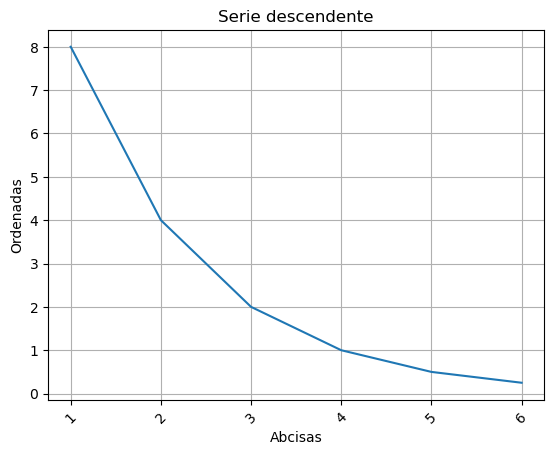

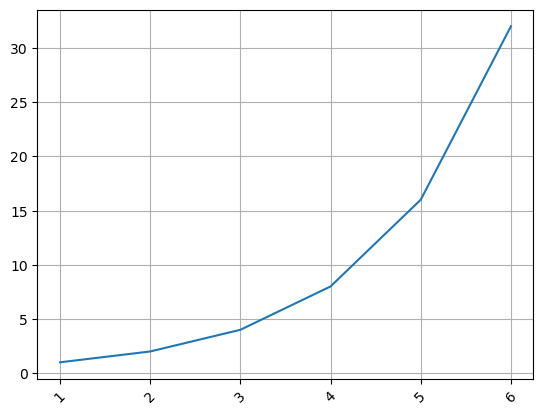

In [31]:
# Pruebas de funcionamiento:

representar_xxx_yyy([(1, 8), (2, 4), (3, 2), (4, 1), (5, 0.5), (6, 0.25)], ["Serie descendente", "Ordenadas", "Abcisas"])

representar_xxx_yyy([(1, 1), (2, 2), (3, 4), (4, 8), (5, 16), (6, 32)])

### Una gráfica concreta

Deseamos representar el número de películas de nuestra base de datos que se han producido en un intervalo de años dado.

In [32]:
def repr_movies_years(main_dict_data, year_start, year_end):
    """
    Representa un gráfico de líneas mostrando el número de películas registradas en la base de datos por año,
    dentro de un rango de años especificado.

    Args:
        main_dict_data (dict): Un diccionario donde las claves son tuplas (título de la película, año),
                                y los valores son listas con los datos de cada película.
        year_start (int): El primer año del rango a analizar.
        year_end (int): El último año del rango a analizar.

    Returns:
        None: La función no retorna nada, solo muestra el gráfico generado.
    """
    movies_per_year = {}
    
    for (movie_title, title_year), data in main_dict_data.items():
        if year_start <= title_year <= year_end:
            if title_year in movies_per_year:
                movies_per_year[title_year] += 1
            else:
                movies_per_year[title_year] = 1

    years_sorted = sorted(movies_per_year.items())
    years, num_movies = zip(*years_sorted)

    plt.figure(figsize=(8, 4))
    plt.plot(years, num_movies)

    plt.title("Number of movies in our database")
    plt.xlabel("Years")
    plt.ylabel("Number of movies in year")
    plt.xticks(rotation=45)
    plt.grid(True)
    
    plt.show()

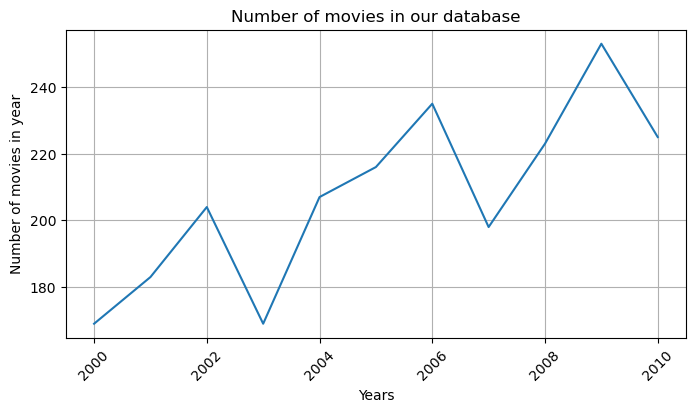

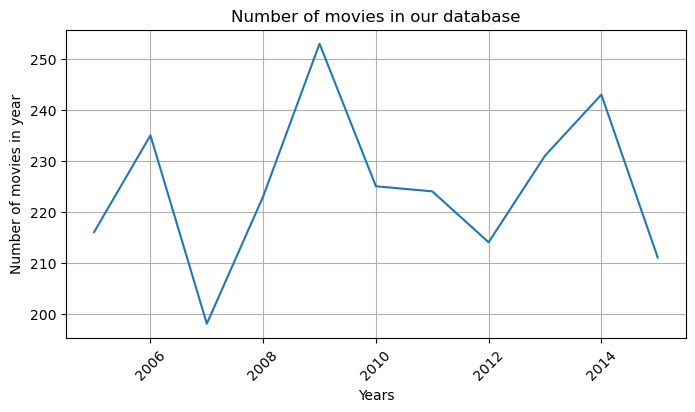

In [33]:
# Test de funcionamiento

repr_movies_years(main_dict_data, 2000, 2010)
repr_movies_years(main_dict_data, 2005, 2015)

# D. Acceso a las urls de imdb y webscraping [2 puntos]

### D.1. Recuperación de las URLs

Con sencillas instrucciones, deseamos recuperar todas las *urls* de las películas de nuestro archivo, mostrando cuántas son, la primera de ellas o las diez primeras por ejemplo:

In [34]:
def get_urls(main_dict_data):
    """
    Extrae las URLs de las películas desde un diccionario de datos de películas.

    Args:
        main_dict_data (dict): Un diccionario donde las claves son tuplas (título de la película, año),
                                y los valores son listas con los datos de cada película. La URL de la película
                                debe ser el último elemento de cada lista.

    Returns:
        list: Una lista de URLs extraídas de los datos de las películas.
    """
    urls = [data[-1] for (movie_title, year), data in main_dict_data.items() if isinstance(data, list) and len(data) > 0]
    return urls

# Obtener las URLs de las películas desde los datos principales
urls = get_urls(main_dict_data)

# Obtener la primera URL de película, si existe, o asignar "Sin URL"
first_url_movie = urls[0] if urls else "Sin URL"

# Obtener las primeras 10 URLs de película, o todas las URLs si hay menos de 10
first_ten_urls = urls[:10] if len(urls) >= 10 else urls

In [35]:
# Test de funcionamiento

print(len(urls))

print()

print(first_url_movie)

print()

print(first_ten_urls)

4919

http://www.imdb.com/title/tt0499549/

['http://www.imdb.com/title/tt0499549/', 'http://www.imdb.com/title/tt0449088/', 'http://www.imdb.com/title/tt2379713/', 'http://www.imdb.com/title/tt1345836/', 'http://www.imdb.com/title/tt5289954/', 'http://www.imdb.com/title/tt0401729/', 'http://www.imdb.com/title/tt0413300/', 'http://www.imdb.com/title/tt0398286/', 'http://www.imdb.com/title/tt2395427/', 'http://www.imdb.com/title/tt0417741/']


In [36]:
# Una forma de evitar el error "Requests 403 forbidden" al hacer web scraping en las siguientes celdas:

HEADERS = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
        "Accept-Language": "en-US,en;q=0.5",
        "Accept-Encoding": "gzip, deflate",
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1",
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-User": "?1",
        "Cache-Control": "max-age=0",
    }

### D.2. Carga de la estructura sintáctica de una URL

Ahora, deseamos extraer el código `html` de una película.

In [37]:
def soup_movie(url):
    """
    Realiza una solicitud HTTP a la URL proporcionada y devuelve el contenido de la página web
    procesado por BeautifulSoup, si la solicitud es exitosa.

    Args:
        url (str): La URL de la página web de la que se desea obtener el contenido.

    Returns:
        BeautifulSoup|None: Un objeto BeautifulSoup con el contenido HTML de la página si la solicitud es exitosa,
                             o None si ocurre un error al hacer la solicitud.
    """
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0"}
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        return soup
    else:
        print(f"Error: {response.status_code}")
        return None

In [38]:
# Test de funcionamiento

soup = soup_movie(first_url_movie)

print(str(soup)[:1000])
print()
print("... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...")
print()
print(str(soup)[-1000:])

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1734560055044);
        }
    })</script><title>Avatar (2009) - IMDb</title><meta content="Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and pr

### D.3. Extracción de algunas piezas de información de una URL

Y ahora, con dicho código, deseamos extraer la siguiente información, referida a la película `first_url_movie`:

- La etiqueta completa del título de la película
- La descripción (sólo el contenido).
- La lista de los actores del *reparto principal*
- La información sobre el presupuesto

In [39]:
def extract_movie_info(soup):
    """
    Extrae la información clave de una página web de película procesada por BeautifulSoup.

    Args:
        soup (BeautifulSoup): Un objeto BeautifulSoup que contiene el contenido HTML de la página de la película.

    Returns:
        tuple: Una tupla con cuatro elementos:
            - title (str): El título de la película.
            - description (str|None): La descripción de la película, o None si no se encuentra.
            - actors (list): Una lista de actores de la película.
            - budget (str): El presupuesto de la película. Si no se encuentra, se devuelve una cadena vacía.
    """
    
    # Obtener el título de la película
    title = soup.title

    # Buscar la sección de descripción y extraer el contenido
    description_section = soup.find('meta', {'name': 'description'})
    description = description_section['content'] if description_section else None

    # Buscar los actores en la página
    actors_section = soup.find_all('a', {'data-testid': 'title-cast-item__actor'})
    actors = [actor.text.strip() for actor in actors_section]
    
    # Buscar el presupuesto de la película
    budget_section = soup.find('div', string=lambda x: x and '$' in x)
    budget = budget_section.text.strip() if budget_section else ''

    return title, description, actors, budget

# Ejemplo de uso
if soup:
    title, description, actors, budget = extract_movie_info(soup)

    print(title)
    print(f"\n{description}")
    print(f"\n{actors}")
    print(f"\n{budget}")

<title>Avatar (2009) - IMDb</title>

Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home.

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Michelle Rodriguez', 'Stephen Lang', 'Giovanni Ribisi', 'Joel David Moore', 'CCH Pounder', 'Wes Studi', 'Laz Alonso', 'Dileep Rao', 'Matt Gerald', 'Sean Anthony Moran', 'Jason Whyte', 'Scott Lawrence', 'Kelly Kilgour', 'James Patrick Pitt', 'Sean Patrick Murphy']

$237,000,000 (estimated)


### D.4. Actores que intervienen en una lista de URLs

Necesitamos crear un archivo con los actores del reparto principal de las películas de IMDB, dada la lista de sus URLs.

In [40]:
def gather_actors(file_name, urls):
    """
    Extrae los nombres de los actores de una lista de URLs y los guarda en un archivo de texto.

    Esta función realiza una solicitud HTTP a cada URL, extrae los nombres de los actores de las páginas
    y guarda los nombres únicos en un archivo de texto. Cada actor se guarda en una línea separada en el archivo.

    Args:
        file_name (str): El nombre del archivo donde se guardarán los actores extraídos.
        urls (list): Una lista de URLs de las páginas de películas de las que se extraerán los actores.

    Returns:
        None: La función no retorna ningún valor. Los actores se guardan directamente en el archivo especificado.
    """
    actors_set = set()
    
    # Iterar sobre las URLs para extraer actores
    for url in urls:
        soup = soup_movie(url)
        if soup:
            # Encontrar todos los actores en la página
            actors_section = soup.find_all('a', {'data-testid': 'title-cast-item__actor'})
            actors = [actor.text.strip() for actor in actors_section]
            actors_set.update(actors)  # Añadir actores al conjunto (elimina duplicados)
    
    # Guardar los actores en el archivo
    with open(file_name, 'w', encoding='utf-8') as f:
        for actor in actors_set:
            f.write(actor + '\n')

In [41]:
# Test de funcionamiento

# OJO: esta operación puede llevar bastante tiempo.
# Para esta prueba, usamos un número limitado de películas.

gather_actors("actors_3_first_movies.txt", urls[:3])

! type actors_3_first_movies.txt

Wes Studi
Michelle Rodriguez
Naomie Harris
Mackenzie Crook
Stephen Lang
Giovanni Ribisi
David Bailie
Keira Knightley
Sean Anthony Moran
Domenico Fortunato
Alessandro Cremona
Dave Bautista
Jack Davenport
CCH Pounder
Stellan SkarsgÃ¥rd
Laz Alonso
Bill Nighy
Monica Bellucci
Christoph Waltz
Kelly Kilgour
Sigourney Weaver
Tom Hollander
Jesper Christensen
Ben Whishaw
Zoe Saldana
Kevin McNally
Jonathan Pryce
David Schofield
LÃ©a Seydoux
Marco Zingaro
Ralph Fiennes
Matt Gerald
Rory Kinnear
Stefano Elfi DiClaudia
Adriana Paz
Daniel Craig
Johnny Depp
Andrew Scott
Stephanie Sigman
Martin Klebba
Tenoch Huerta
Sean Patrick Murphy
Geoffrey Rush
James Patrick Pitt
Joel David Moore
Dileep Rao
Sam Worthington
Orlando Bloom
Dermot Keaney
Lauren Maher
Lee Arenberg
Jason Whyte
Scott Lawrence


In [42]:
# La siguente llamada llevaría un tiempo realmente largo:

# import time # para cronometrar esta función, que tarda mucho

# reloj_inicio = time.time()
# gather_actors("actors_all_movies.txt", urls)
# reloj_fin = time.time()

# print("Tiempo invertido: %s segundos." % (reloj_fin - reloj_inicio))

# E. Pandas [2 puntos]

### E.1. El primer paso es la carga del archivo en un dataframe

In [43]:
def load_dataframe(file):
    """
    Carga un archivo CSV en un DataFrame de pandas.

    Esta función lee un archivo CSV especificado y lo carga en un DataFrame de pandas, que puede ser utilizado
    para realizar análisis de datos y manipulaciones posteriores.

    Args:
        file (str): La ruta del archivo CSV que se desea cargar.

    Returns:
        pandas.DataFrame: Un DataFrame que contiene los datos del archivo CSV.
    """
    dataframe = pd.read_csv(file)
    return dataframe

In [44]:
# Test de funcionamiento

tabla_completa = load_dataframe(MOVIES_DATA)

tabla_completa

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


### E.2. Tabla de los campos principales

A pertir de la tabla anterior, construimos otra con sólo algumos de los campos:

In [45]:
def fields_selected_dataframe(dataframe):
    """
    Selecciona un subconjunto de columnas específicas de un DataFrame.

    Esta función toma un DataFrame de pandas y retorna un nuevo DataFrame que contiene solo las columnas
    seleccionadas previamente definidas.

    Args:
        dataframe (pandas.DataFrame): El DataFrame original que contiene los datos completos.

    Returns:
        pandas.DataFrame: Un nuevo DataFrame que solo contiene las columnas seleccionadas.
    """
    columns = ['movie_title', 'color', 'director_name', 'language', 'country', 'actor_1_name', 'movie_imdb_link']
    return dataframe[columns]

In [46]:
# test de comprobación

tabla_breve = fields_selected_dataframe(tabla_completa)

tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Doug Walker,NaN,NaN,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,NaN,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


### E.3. Columnas de una tabla

¿Cuáles son las columnas de nuestrsa `tabla_breve`?

In [47]:
# Imprimir los nombres de las columnas del DataFrame 'tabla_breve'
print(tabla_breve.columns)

Index(['movie_title', 'color', 'director_name', 'language', 'country',
       'actor_1_name', 'movie_imdb_link'],
      dtype='object')


### E.4. Campos missing

Algunos campos muestran un valod `NaN`. Deseamos cambiarlo por una cadena de caracteres: `"Desc"`.

In [48]:
# Reemplazar los valores NaN en el DataFrame 'tabla_breve' con el valor "Desc"
tabla_breve.fillna("Desc", inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5448\3883974129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_breve.fillna("Desc", inplace=True)


In [49]:
# Test de comprobación

tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,Desc,Doug Walker,Desc,Desc,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,Desc,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


### E.5. Director $\rightarrow$ películas y número de películas

Función que averigua la lista de títulos de películas de un director dado:

In [50]:
def titulos_de_director_df(dataframe, director_name):
    """
    Filtra los títulos de películas dirigidas por un director específico.

    Esta función toma un DataFrame de pandas y filtra las filas que corresponden a un director específico.
    Luego, retorna un DataFrame con solo los títulos de las películas de ese director.

    Args:
        dataframe (pandas.DataFrame): El DataFrame que contiene los datos de las películas.
        director_name (str): El nombre del director por el cual se desea filtrar las películas.

    Returns:
        pandas.DataFrame: Un DataFrame que contiene solo los títulos de las películas dirigidas por el director especificado.
    """
    filter_df = dataframe[dataframe['director_name'] == director_name]
    return filter_df[['movie_title']]

In [51]:
# Test de comprobación:

tabla_tits = titulos_de_director_df(tabla_breve, "James Cameron")
tabla_tits

,movie_title
0,Avatar
26,Titanic
288,Terminator 2: Judgment Day
291,True Lies
606,The Abyss
2486,Aliens
3575,The Terminator


In [52]:
# Convertir la columna 'movie_title' del DataFrame 'tabla_tits' en una lista
list_tits = tabla_tits["movie_title"].to_list()

# Imprimir la lista de títulos de películas
print(list_tits)

['Avatar\xa0', 'Titanic\xa0', 'Terminator 2: Judgment Day\xa0', 'True Lies\xa0', 'The Abyss\xa0', 'Aliens\xa0', 'The Terminator\xa0']


Deseamos saber qué directores han dirigido el máximo número de películas, junto con ese número de películas.

In [53]:
def directors_max_movies_df(dataframe):
    """
    Encuentra los directores con la mayor cantidad de películas en el DataFrame.

    Esta función filtra el DataFrame para eliminar filas donde el nombre del director es "Desc", luego calcula
    el número de películas dirigidas por cada director. Finalmente, retorna una lista de los directores con más películas
    y la cantidad máxima de películas dirigidas.

    Args:
        dataframe (pandas.DataFrame): El DataFrame que contiene los datos de las películas.

    Returns:
        tuple: Un tuple con dos elementos:
            - Una lista de directores con la mayor cantidad de películas.
            - Un valor entero que representa la cantidad máxima de películas dirigidas.
    """
    # Filtrar el DataFrame para excluir las filas con director "Desc"
    filtered_dataframe = dataframe[dataframe['director_name'] != "Desc"]
    
    # Contar la cantidad de películas por director
    director_counts = filtered_dataframe['director_name'].value_counts()
    
    # Obtener el número máximo de películas dirigidas
    max_count = director_counts.max()
    
    # Obtener los directores que tienen el número máximo de películas dirigidas
    directors_max = director_counts[director_counts == max_count].index.tolist()
    
    return directors_max, max_count

In [54]:
# test de comprobación:

directors_max_movies_df(tabla_breve)

(['Steven Spielberg'], 26)

# Parte F. Un cálculo masivo con map-reduce [0,5 puntos]

En este apartado se ha de realizar un programa aparte, *basado en la técnica de map-reduce*, que calcule, para cada idioma, en qué países en que se han producido películas y la suma de los presupuestos de dichas películas. Cuando el idioma o el país o el presupuesto no se conozcan, no se considerará esta película.

    C:\...> python language_budget_countries.py -q algunos_campos.txt

El programa funcionará necesariamente con la técnica map-reduce, que podemos poner en juego con la librería `mrjob`.

El funcionamiento del mismo se puede activar también desde aquí:

In [55]:
# Hagamos una llamada al programa de consola desde aquí:

! python language_budget_countries.py -q algunos_campos.txt

"Aboriginal"	[["Australia","UK"],86000000.0]
"Arabic"	[["Egypt","France","Germany","Turkey","United Arab Emirates"],11224999.0]
"Aramaic"	[["USA"],30000000.0]
"Bosnian"	[["USA"],13000000.0]
"Cantonese"	[["China","Hong Kong","USA"],154499998.0]
"Chinese"	[["China"],11999998.0]
"Czech"	[["Czech Republic"],84450000.0]
"Danish"	[["Denmark"],50099998.0]
"Dari"	[["Afghanistan","USA"],20046000.0]
"Dutch"	[["Netherlands"],32150000.0]
"Dzongkha"	[["Australia"],1800000.0]
"English"	[["Aruba","Australia","Bahamas","Belgium","Brazil","Bulgaria","Cambodia","Cameroon","Canada","Chile","China","Czech Republic","Denmark","France","Georgia","Germany","Greece","Hong Kong","Hungary","Iceland","India","Iran","Ireland","Italy","Japan","Kyrgyzstan","Libya","Mexico","Netherlands","New Line","New Zealand","Nigeria","Norway","Official site","Panama","Peru","Philippines","Poland","Romania","Russia","Slovakia","South Africa","South Korea","Spain","Switzerland","Thailand","UK","USA","West Germany"],141954874840.0

In [56]:
# Para que el resultado se almacene en un archivo:

! python language_budget_countries.py -q algunos_campos.txt > language_countries_budgets.txt

La siguiente celda me permite ver tu programa cómodamente desde aquí.

In [57]:
def print_file(filename):
    with open(filename, "r") as f:
        for line in f:
            print(line, end="")
            
print_file("language_budget_countries.py")

from mrjob.job import MRJob
import csv

class MRLanguageBudgetCountries(MRJob):

    def mapper(self, _, line):
        try:
            movie_title, title_year, language, country, budget = line.split('|')

            if all(x for x in [movie_title, title_year, language, country, budget]):
                yield language, (country, float(budget))
        except ValueError:
            pass

    def reducer(self, language, values):
        countries = set()
        total_budget = 0
        for country, budget in values:
            countries.add(country)
            total_budget += budget
        yield language, (sorted(list(countries)), total_budget)

if __name__ == "__main__":
    MRLanguageBudgetCountries.run()

# Parte G. Un apartado libre [0.5 puntos]

Para esta ultima parte, voy a crear una función llamada best_movies_genre que tome el DataFrame y un valor adicional que corresponde a un género. La función debe filtrar las películas que contengan ese género en la columna 'genres' (ignorando mayúsculas y minúsculas), ordenar los resultados por la columna 'imdb_score' en orden descendente y mostrar las 5 películas con mayor puntaje, mostrando únicamente la columna 'movie_title'.

In [58]:
def best_movies_genre(dataframe, genre):
    """
    Encuentra las mejores películas de un género específico según su puntuación en IMDb.

    Esta función filtra el DataFrame para obtener las películas que pertenecen a un género específico,
    las ordena por su puntuación en IMDb de mayor a menor y retorna las 5 mejores películas.

    Args:
        dataframe (pandas.DataFrame): El DataFrame que contiene los datos de las películas, donde una columna es `'genres'` 
                                      y otra es `'imdb_score'`.
        genre (str): El nombre del género de las películas que se desean filtrar.

    Returns:
        pandas.DataFrame: Un DataFrame que contiene las 5 mejores películas del género, con las columnas `'movie_title'` e `'imdb_score'`.
    """
    # Filtrar las películas que contienen el género especificado (insensible a mayúsculas)
    filtered_df = dataframe[dataframe['genres'].str.contains(genre, case=False, na=False)]
    
    # Ordenar las películas por la puntuación en IMDb de mayor a menor
    top_movies = filtered_df.sort_values(by='imdb_score', ascending=False)
    
    # Seleccionar las 5 mejores películas
    result = top_movies[['movie_title', 'imdb_score']].head(5)
    
    return result

In [59]:
# Pruebas de funcionamiento, también tarea del estudiante:

best_movies_genre(tabla_completa, "adventure")


,movie_title,imdb_score
339,The Lord of the Rings: The Return of the King,8.9
97,Inception,8.8
2051,Star Wars: Episode V - The Empire Strikes Back,8.8
270,The Lord of the Rings: The Fellowship of the R...,8.8
459,Daredevil,8.8


Ahora haré algo similar al anterior, pero ahora para ver el top de mejores peliculas de acuerdo a la busqueda por palabra clave, es decir si se quiere buscar peliculas de guerra, que al poner war me ponga las mejores peliculas de esa tematica.

In [60]:
def best_movies_theme(dataframe, theme):
    """
    Encuentra las mejores películas de un tema específico según su puntuación en IMDb.

    Esta función filtra el DataFrame para obtener las películas que contienen una palabra clave de tema
    en la descripción de su trama (columna 'plot_keywords'). Luego, ordena las películas por su puntuación 
    en IMDb de mayor a menor y retorna las 5 mejores películas.

    Args:
        dataframe (pandas.DataFrame): El DataFrame que contiene los datos de las películas, donde una columna es `'plot_keywords'` 
                                      y otra es `'imdb_score'`.
        theme (str): La palabra clave del tema que se desea filtrar.

    Returns:
        pandas.DataFrame: Un DataFrame que contiene las 5 mejores películas con el tema especificado, 
                           mostrando las columnas `'movie_title'` e `'imdb_score'`.
    """
    # Filtrar las películas que contienen el tema especificado en la columna 'plot_keywords'
    filtered_df = dataframe[dataframe['plot_keywords'].str.contains(theme, case=False, na=False)]
    
    # Ordenar las películas por la puntuación en IMDb de mayor a menor
    top_movies = filtered_df.sort_values(by='imdb_score', ascending=False)
    
    # Seleccionar las 5 mejores películas
    result = top_movies[['movie_title', 'imdb_score']].head(5)
    
    return result

In [61]:
best_movies_theme(tabla_completa, "war")

,movie_title,imdb_score
4498,"The Good, the Bad and the Ugly",8.9
836,Forrest Gump,8.8
3024,Star Wars: Episode IV - A New Hope,8.7
1448,The Pianist,8.5
4359,Dr. Strangelove or: How I Learned to Stop Worr...,8.5


# Datos personales

<br>

<font color="darkblue">

-   **Apellidos:** Calderon Quintero
-   **Nombre:** William Sebastian
-   **Email:** sebastiancalderonquintero@gmail.com
-   **Fecha:** 19/12/2024

<br>

<font color="black">
    
### Ficha de autoevaluación

<br>

<font>
En el actual proyecto logré desarrollar cada una de los ejercicios obteniendo los resultados esperados. Todos los ejercicios fueron completados en su 100% haciendo uso de las instrucciones y probando los test de funcionalidad en cada uno de los ejercicios. 
    
</font>

<br>

<font color="darkblue">
    
|Apartado|Calificación|Comentario|
|-|-|-|
|a)  |2.0  / 2.5  |Completamente resuelto |
|b)  |0.0  / 2.0  |No lo he conseguido |
|c)  |0.0  / 1.5  |No he entendido el enunciado |
|d)  |0.25 / 1.0  |Sólo he conseguido una parte mínima |
|e)  |0.0  / 2.0  |No lo he conseguido |
|f)  |0.5  / 0.5  |No lo he conseguido más que mínimamente |
|g)  |0.0  / 0.5  |No he logrado el correcto funcionamiento |
|**Total** |**10.0** / 10.0|**Exito**|
</font>

<br>

<font color="black">
   
### Ayuda recibida y fuentes utilizadas
    
</font>

<br>

<font>
    <p>*** Para el ejercicio de MapReduce trabajé en conjunto con varios compañeros, por lo que tendremos la función del archivo de python similar, pues nos costó hacerlo por nuestra cuenta, pero lo conseguimos.</p>
    <br>
    <p>Documentación de Python - <a href="https://docs.python.org/3/">https://docs.python.org/3/</a></p>
    <br>
    <p>Gemini IA - <a href="https://gemini.google.com/app">https://gemini.google.com/app</a></p>
</font>

<br>

<font color="black">
    


In [62]:
# Esta celda se ha de respetar: está aquí para comprobar
# el funcionamiento de algunas funciones por parte de tu profesor
